# Tunisian Startups Ecosystem Analysis

## Project overview
The following analysis serves as a proof of concept for evaluating startup ecosystems. While the project is still under active development, the initial results successfully identify key trends and sectoral distributions, providing a validated foundation for further expansion.
The data is taken from the official Tunisian Startup Database https://startup.gov.tn/en/database. Due to technical limitations with the website's download functionality, I implemented a web scraping solution to collect the complete dataset for analysis.
The total number of startups in this database is 915.
Due to the lack of the financial data, I wasnt able to get an in deph analysis.
The first step is data cleaning, the data was already in a good shape: There are 92 missing websites and 62 missing descriptions.

In [2]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# Set up visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

# Load the data
file = 'tunisian_startups.csv'
df = pd.read_csv(file, sep=',')

# Display basic information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\n" + "="*50)

=== DATASET OVERVIEW ===
Shape: (915, 8)
Columns: ['name', 'sector', 'year_founded', 'label_date', 'website', 'description', 'founders', 'email']



### Data Cleaning

In [13]:
# Data cleaning and preparation
print("=== DATA CLEANING ===")

# Check for missing values
missing_data = df.isnull().sum()
print("Missing values per column:")
print(missing_data)
print("\n" + "="*50)

# Clean year_founded - convert to numeric, handle errors
df['year_founded'] = pd.to_numeric(df['year_founded'], errors='coerce')

# Extract email domains for analysis
df['email_domain'] = df['email'].str.split('@').str[1]

print("Basic data cleaning completed!")
print(f"Years range: {df['year_founded'].min()} - {df['year_founded'].max()}")

=== DATA CLEANING ===
Missing values per column:
name             0
sector           0
year_founded     0
label_date       0
website         92
description     62
founders         0
email            0
dtype: int64

Basic data cleaning completed!
Years range: 2011 - 2025


In [14]:
print("=== Website ANALYSIS ===")
print(f"Total startups: {len(df)}")

# Check website column
websites = df['website']
print(f"Missing websites: {websites.isna().sum()}")
print(f"Empty strings: {len(websites[websites == ''])}")
print(f"'n.a.' values: {len(websites[websites == 'n.a.'])}")
print(f"'N.A.' values: {len(websites[websites == 'N.A.'])}")

# Check valid URLs
valid_urls = websites[websites.notna() & ~websites.isin(['', 'n.a.', 'N.A.'])]
print(f"Potentially valid URLs: {len(valid_urls)}")

print("\nFirst 10 'valid' URLs:")
for url in valid_urls.head(10):
    print(f"  {url}")

=== Website ANALYSIS ===
Total startups: 915
Missing websites: 92
Empty strings: 0
'n.a.' values: 0
'N.A.' values: 0
Potentially valid URLs: 823

First 10 'valid' URLs:
  http://www.decotis.tn
  https://stark-erp.com/
  http://etakwin.com
  https://animadop.tn/
  http://www.lamma.city
  http://www.syndic.digital 
  http://www.avempace-wireless.com
  https://www.data-era.co
  https://www.winicari.tn/
  https://www.impactnutrition.com.tn


In [15]:
df.head()

,name,sector,year_founded,label_date,website,description,founders,email,email_domain
0,Décotis,Real Estate Tech,2021,11/2021,http://www.decotis.tn,Une solution de mise en connexion entre client...,"Meher Hedhli, Mohamed Barki",n.a.,NaN
1,STARK,Business Software and services,2019,06/2020,https://stark-erp.com/,Un ERP Multi-devices en deux versions : OnPrem...,Mohamed Mzid,n.a.,NaN
2,KLAY,Wellness,2020,09/2020,NaN,"Sportology est spécialisée dans la conception,...","Mohamed Hedi Ben Hamed, Moez Aousji",n.a.,NaN
3,Etakwin,EdTech,2020,09/2020,http://etakwin.com,Etakwin est un système de gestion d'apprentiss...,"Sawsan Bellaj, Moez Bouhlel, Mhammed Bellaj",n.a.,NaN
4,Animadop,Communication services,2020,11/2020,https://animadop.tn/,Animadop est une plateforme sociale autour des...,"khalil ben said, Fatma Essafi",n.a.,NaN


### Exploratory analysis

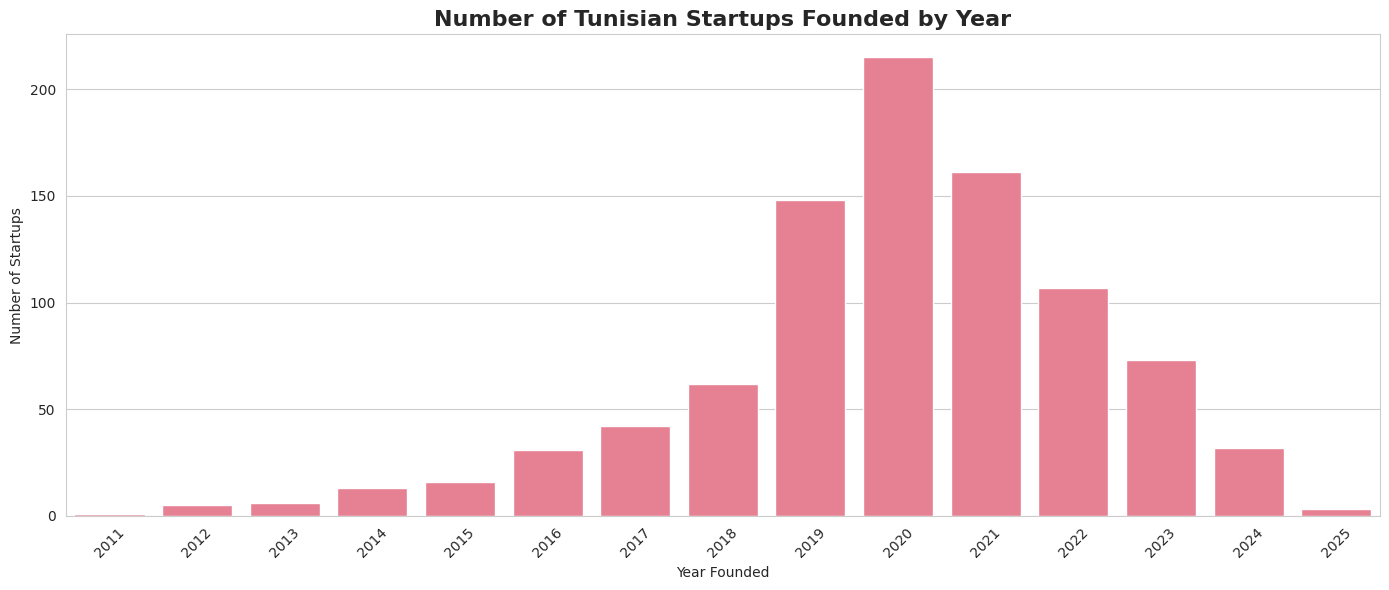

=== YEAR FOUNDED ANALYSIS ===
Earliest startup: 2011
Latest startup: 2025
Average year: 2020.0
Most common year: 2020


In [16]:
# 1. Distribution by Year Founded
plt.figure(figsize=(14, 6))
year_counts = df['year_founded'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Number of Tunisian Startups Founded by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year Founded')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Year founded statistics
print("=== YEAR FOUNDED ANALYSIS ===")
print(f"Earliest startup: {df['year_founded'].min()}")
print(f"Latest startup: {df['year_founded'].max()}")
print(f"Average year: {df['year_founded'].mean():.1f}")
print(f"Most common year: {df['year_founded'].mode().values[0]}")

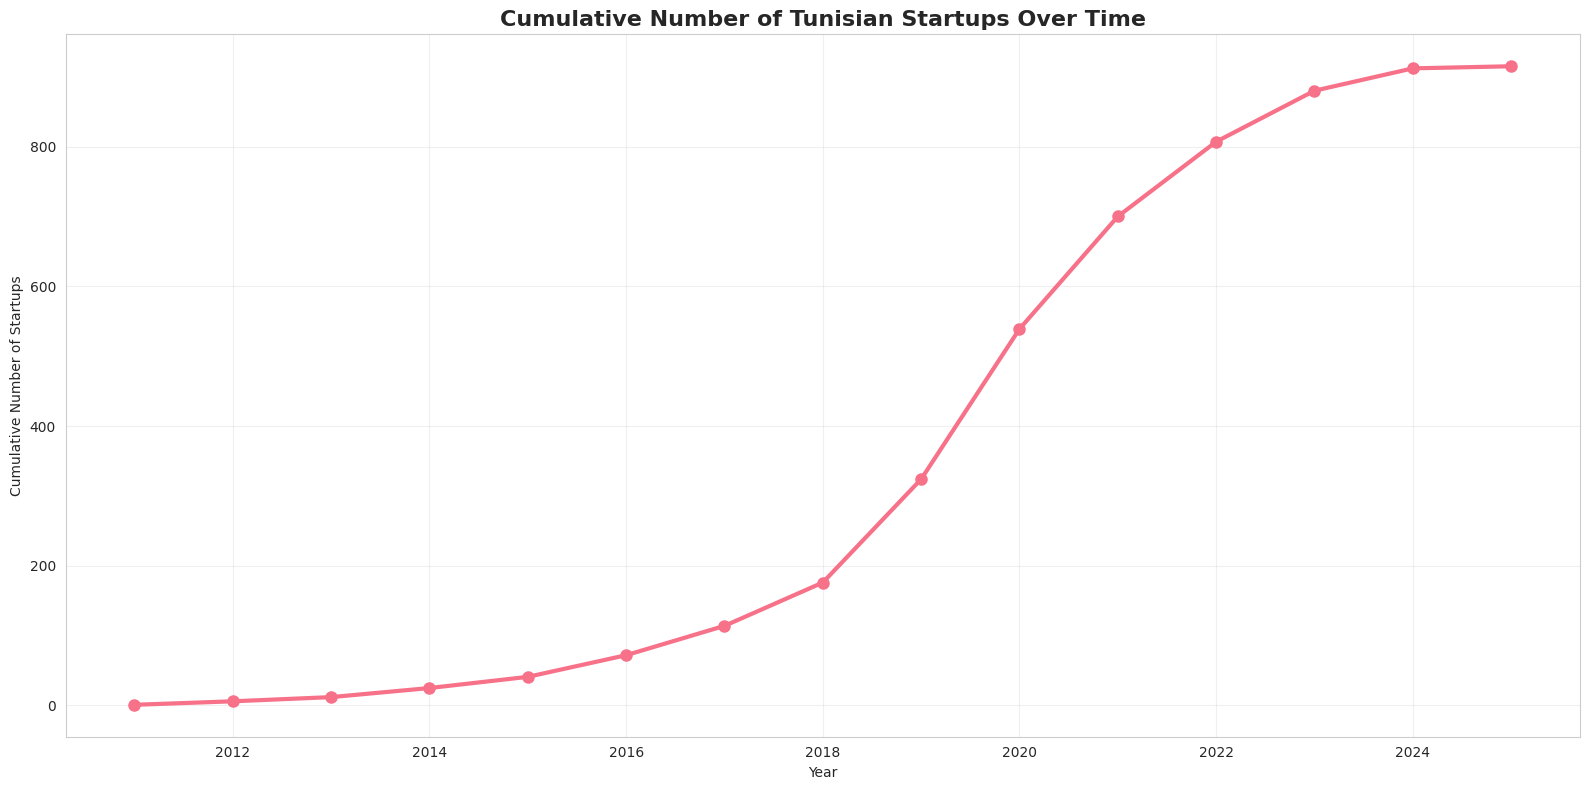

In [ ]:
# 2. Timeline of Startup Formation
plt.figure(figsize=(16, 8))
timeline_data = df.groupby('year_founded').size().cumsum()
plt.plot(timeline_data.index, timeline_data.values, marker='o', linewidth=3, markersize=8)
plt.title('Cumulative Number of Tunisian Startups Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Startups')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Our analysis reveals a distinct three-phase evolution in Tunisia's startup ecosystem. The period from 2011 to 2017 was characterized by steady, organic growth, laying the foundation for what would become a vibrant entrepreneurial landscape.

This gradual expansion culminated in an exponential surge between 2017 and 2020, where startup formation rates accelerated dramatically. This transformative phase can be directly attributed to Tunisia's Startup Act of 2018 – landmark legislation that created unprecedented incentives through tax benefits, streamlined regulations, and enhanced funding opportunities. The Act served as a powerful catalyst, triggering a national entrepreneurial renaissance and positioning Tunisia as a regional innovation hub.

However, the period from 2020 to 2024 witnessed a concerning downward trajectory, with startup formation rates declining consistently. This contraction likely reflects the compounded impact of multiple headwinds: the global COVID-19 pandemic's disruptive effects, evolving economic challenges, and potential market saturation in certain sectors. This trend suggests that while regulatory frameworks can ignite rapid growth, sustaining momentum requires additional support mechanisms and adaptive economic policies.

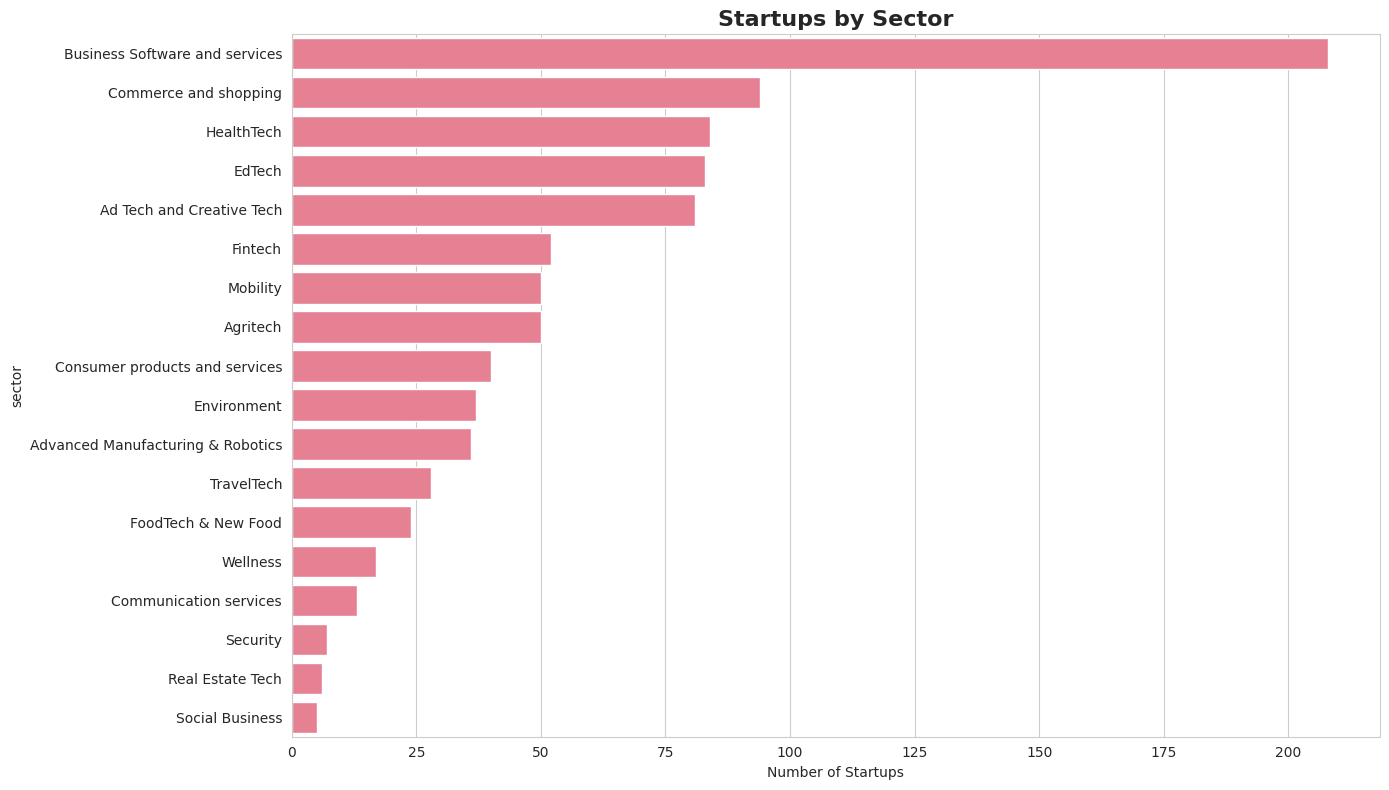

=== SECTOR ANALYSIS ===
Total sectors: 18
Top 5 sectors:
sector
Business Software and services    208
Commerce and shopping              94
HealthTech                         84
EdTech                             83
Ad Tech and Creative Tech          81
Name: count, dtype: int64


In [ ]:
# 3. Sector Analysis
plt.figure(figsize=(14, 8))
sector_counts = df['sector'].value_counts()
sns.barplot(x=sector_counts.values, y=sector_counts.index)
plt.title('Startups by Sector', fontsize=16, fontweight='bold')
plt.xlabel('Number of Startups')
plt.tight_layout()
plt.show()

print("=== SECTOR ANALYSIS ===")
print(f"Total sectors: {df['sector'].nunique()}")
print("Top 5 sectors:")
print(sector_counts.head(5))

Tunisia's startup ecosystem is dominated by Business Software & Services (∼200 startups), a sector with strong international scalability that leverages global digital markets. This export-focused concentration contrasts with locally-oriented sectors like Commerce, HealthTech, and EdTech (100-150 startups), while specialized domains including Agritech and Advanced Manufacturing remain underdeveloped (<50 startups). The distribution reflects strategic positioning in globally competitive digital services rather than purely domestic market focus.

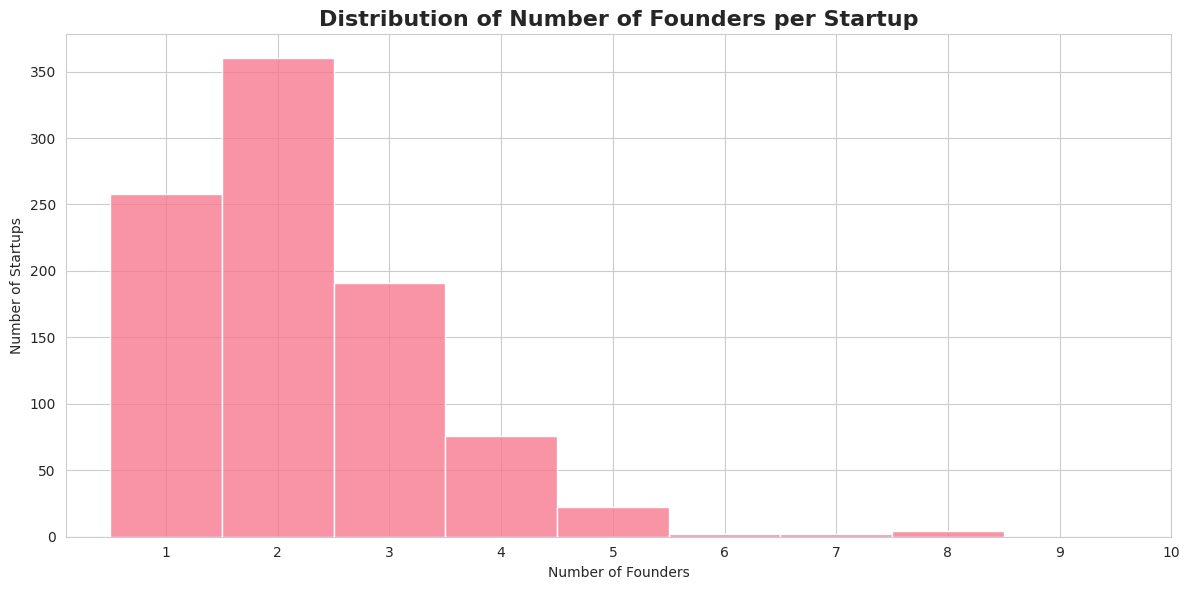

=== FOUNDERS ANALYSIS ===
Average founders per startup: 2.2
Maximum founders: 8


In [ ]:
# 4. Founders Analysis - Count number of founders per startup
df['founder_count'] = df['founders'].str.split(',').str.len()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='founder_count', bins=range(1, 11), discrete=True)
plt.title('Distribution of Number of Founders per Startup', fontsize=16, fontweight='bold')
plt.xlabel('Number of Founders')
plt.ylabel('Number of Startups')
plt.xticks(range(1, 11))
plt.tight_layout()
plt.show()

print("=== FOUNDERS ANALYSIS ===")
print(f"Average founders per startup: {df['founder_count'].mean():.1f}")
print(f"Maximum founders: {df['founder_count'].max()}")

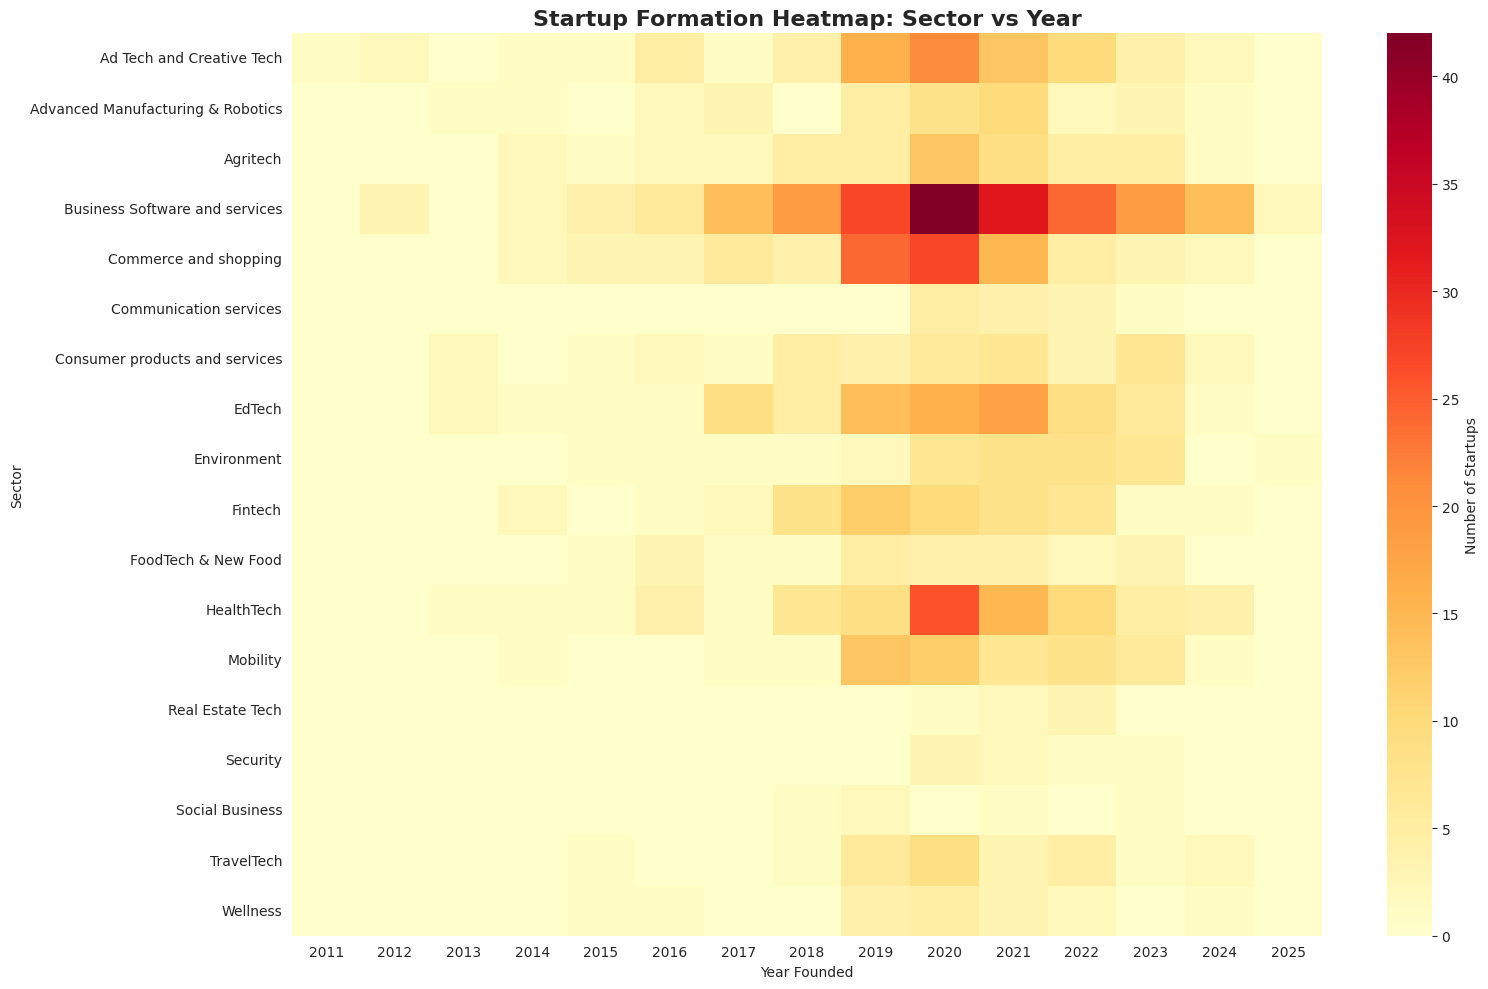

In [ ]:
# 5. Sector vs Year Heatmap
plt.figure(figsize=(16, 10))
sector_year = pd.crosstab(df['sector'], df['year_founded'])
sns.heatmap(sector_year, cmap='YlOrRd', cbar_kws={'label': 'Number of Startups'})
plt.title('Startup Formation Heatmap: Sector vs Year', fontsize=16, fontweight='bold')
plt.xlabel('Year Founded')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()

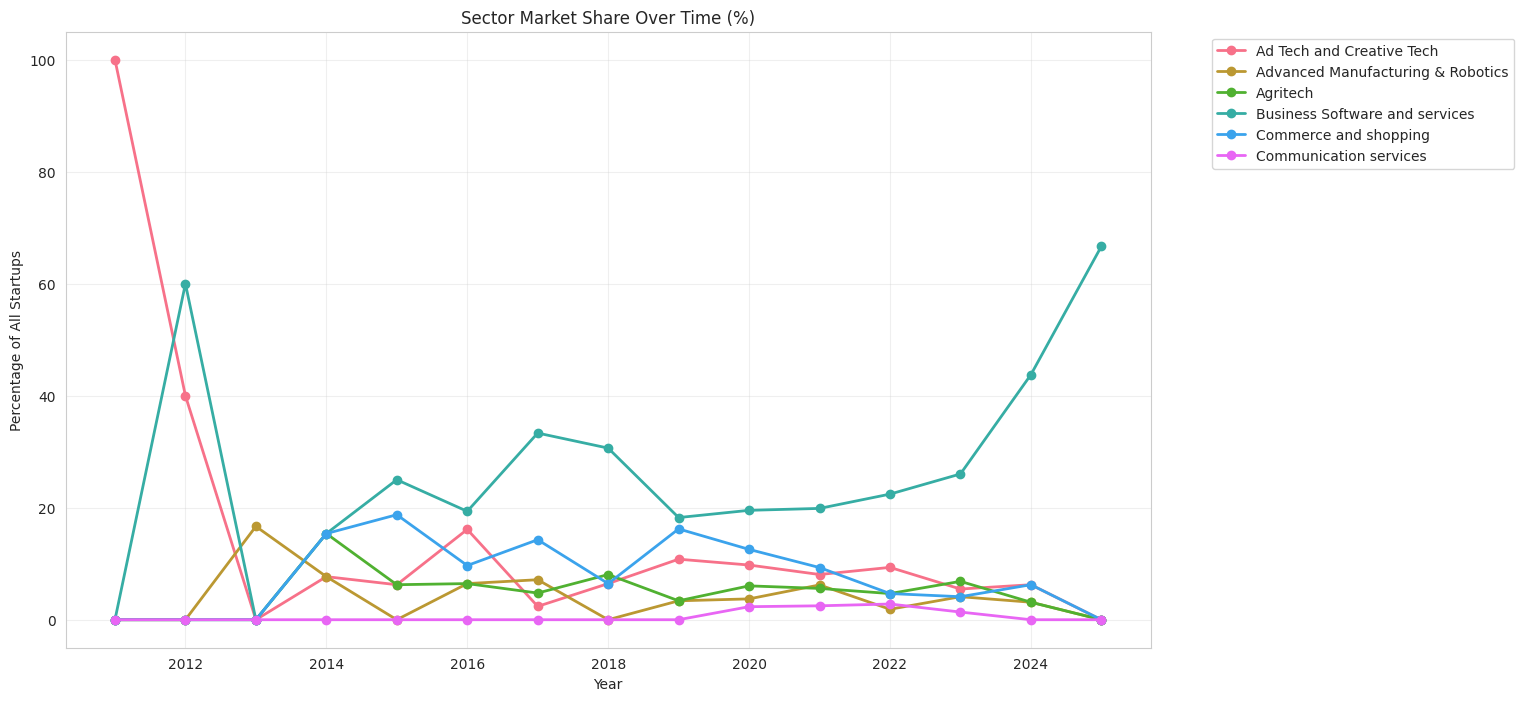

In [ ]:
# 6. Sector Market Share Over Time
yearly_totals = df['year_founded'].value_counts().sort_index()
sector_year_pct = sector_year.div(yearly_totals, axis=0) * 100

plt.figure(figsize=(14, 8))
for sector in sector_year_pct.columns[:6]:  # Top 6 sectors
    plt.plot(sector_year_pct.index, sector_year_pct[sector], 
             marker='o', label=sector, linewidth=2)

plt.title('Sector Market Share Over Time (%)')
plt.xlabel('Year')
plt.ylabel('Percentage of All Startups')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# 7. Evolution Of Tunisian Startup Sectors
sector_evolution = df.groupby(['year_founded', 'sector']).size().reset_index(name='count')

# Create interactive line chart with time slider
fig = px.line(sector_evolution, 
              x='year_founded', 
              y='count', 
              color='sector',
              title='📈 Evolution of Tunisian Startup Sectors',
              labels={'year_founded': 'Year Founded', 'count': 'Number of Startups'},
              markers=True)

# Add the time range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=5, label="5y", step="year", stepmode="backward"),
                dict(step="all", label="All")
            ])
        ),
        rangeslider=dict(visible=True),
        type="linear"
    )
)

fig.show()

In [ ]:
# 8. Comprehensive Summary Report
print("=== COMPREHENSIVE SUMMARY REPORT ===")
print(f"Total startups analyzed: {len(df)}")
print(f"Time period: {df['year_founded'].min()} - {df['year_founded'].max()}")
print(f"Number of unique sectors: {df['sector'].nunique()}")
print(f"Most common sector: {df['sector'].mode().values[0]}")
print(f"Average founding team size: {df['founder_count'].mean():.1f} people")
print(f"Startups with websites: {df['website'].notnull().sum()} ({df['website'].notnull().mean()*100:.1f}%)")
print(f"Startups with email contacts: {df['email'].notnull().sum()} ({df['email'].notnull().mean()*100:.1f}%)")

# Most recent startups
recent_startups = df.nlargest(5, 'year_founded')[['name', 'sector', 'year_founded']]
print("\nMost recent startups:")
print(recent_startups.to_string(index=False))

=== COMPREHENSIVE SUMMARY REPORT ===
Total startups analyzed: 915
Time period: 2011 - 2025
Number of unique sectors: 18
Most common sector: Business Software and services
Average founding team size: 2.2 people
Startups with websites: 823 (89.9%)
Startups with email contacts: 915 (100.0%)

Most recent startups:
          name                         sector  year_founded
      IsOne Hr Business Software and services          2025
Save The Plate                    Environment          2025
 Skazy Tunisia Business Software and services          2025
       Guepard Business Software and services          2024
      Saydalid                     HealthTech          2024


The provided visualization illustrates the dynamic evolution of market share distribution across key sectors within the Tunisian startup ecosystem from 2012 to 2024. The analysis reveals several critical trends regarding the concentration and diversification of entrepreneurial activity.

1. Dominance and Growth of Business Software & Services:
This sector demonstrates a clear and consistent trajectory of market leadership. It has not only maintained the largest share of startup formations but has also significantly increased its dominance over time. This indicates a powerful, sustained competitive advantage and suggests the emergence of a strong, export-oriented tech cluster capable of leveraging global demand for digital services.

2. Relative Decline of Commerce & Shopping:
While still a significant segment of the ecosystem, the Commerce and Shopping sector has seen a relative contraction in its market share. This trend suggests market maturation, increased competitive saturation, or a strategic pivot of entrepreneurial and investment capital towards higher-margin, globally scalable B2B software models.

3. Emergence and Stabilization of Niche Sectors:
Sectors such as Ad Tech & Creative Tech, Advanced Manufacturing & Robotics, and ArtinTech have established a stable, albeit smaller, presence within the ecosystem. Their consistent, though modest, market share indicates successful niche formation and the development of specialized sub-ecosystems, albeit without achieving breakout growth.

4. Macro Interpretation: Strategic Market Concentration:
The overall trend points toward a strategic concentration rather than diversification of the ecosystem. The growing dominance of Business Software suggests a market-efficient allocation of resources toward domains where Tunisia holds a comparative advantage, particularly in global IT services and SaaS. This mirrors successful patterns observed in other emergi

### Conclusion
The Tunisian startup ecosystem demonstrates strategic sector concentration, dominated by B2B software and business services—a deliberate focus that enables international scalability and leverages global digital market opportunities. This specialization reflects Tunisia's competitive advantage in exportable digital services rather than purely domestic consumer markets. While this focus has driven significant growth, the recent decline suggests the need for renewed support mechanisms and potential diversification into underserved sectors like Agritech and FoodTech to ensure sustainable long-term development. The ecosystem has successfully identified its strengths; the next challenge is broadening its foundation while maintaining its global competitiveness.